In [6]:
# try 
import json

def synthesize_data(input_name):

    with open("durations/"+input_name+".txt") as f:
        duration_lines = [float(line[:-1]) for line in f]
        duration_avg = sum(duration_lines)/len(duration_lines)
        duration_var = sum((i - duration_avg) ** 2 for i in duration_lines) / len(duration_lines)

    with open("platforms/"+input_name+".json") as f:
        platform = json.load(f)
        platform = platform.values

    with open("schemes/"+input_name+".json") as f:
        scheme_lines = [line[:-1] for line in f]
        loop_order = scheme_lines[0]
        blocking_scheme = scheme_lines[1]

    return duration_avg, duration_var,platform,loop_order[1:21]

In [7]:
# import required module
import os
# assign directory
compiled_directory = 'compiled/'
durations_directory = 'durations/'
platforms_directory = 'platforms/'
schemes_directory = 'schemes/'
 
durations_dict = {"vgg1":[],
                 "vgg2":[],
                 "vgg3":[],
                 "vgg4":[]}

dur_var_dict = {"vgg1":[],
                "vgg2":[],
                "vgg3":[],
                "vgg4":[]}

platforms_dict = {"vgg1":[],
                 "vgg2":[],
                 "vgg3":[],
                 "vgg4":[]}

schemes_dict = {"vgg1":[],
                 "vgg2":[],
                 "vgg3":[],
                 "vgg4":[]}


# iterate over files in
# that directory
for filename in os.listdir(compiled_directory):
    if "vgg" not in filename:
        continue
    duration_avg, duration_var, platform,loop_order_1 = synthesize_data(filename)

    durations_dict[filename[0:4]].append(duration_avg)
    dur_var_dict[filename[0:4]].append(duration_var)
    schemes_dict[filename[0:4]].append(loop_order_1)

In [9]:
import pandas as pd
df_vgg1 = pd.DataFrame(list(zip(durations_dict["vgg1"],dur_var_dict["vgg1"],schemes_dict["vgg1"])),columns=['duration',"var",'loop_order_1'])
df_vgg2 = pd.DataFrame(list(zip(durations_dict["vgg2"],dur_var_dict["vgg2"],schemes_dict["vgg2"])),columns=['duration',"var",'loop_order_1'])
df_vgg3 = pd.DataFrame(list(zip(durations_dict["vgg3"],dur_var_dict["vgg3"],schemes_dict["vgg3"])),columns=['duration',"var",'loop_order_1'])
df_vgg4 = pd.DataFrame(list(zip(durations_dict["vgg4"],dur_var_dict["vgg4"],schemes_dict["vgg4"])),columns=['duration','var','loop_order_1'])

In [10]:
df_vgg1.sort_values('loop_order_1')
df_vgg2.sort_values('loop_order_1')
df_vgg3.sort_values('loop_order_1')
df_vgg4.sort_values('loop_order_1')

,duration,var,loop_order_1
6,58.49245,3.469134,"['d', 'f', 'h', 'w']"
23,58.32570,4.570020,"['d', 'f', 'w', 'h']"
3,57.93875,5.022663,"['d', 'h', 'f', 'w']"
1,58.07540,5.219261,"['d', 'h', 'w', 'f']"
13,57.85210,5.123100,"['d', 'w', 'f', 'h']"
15,57.64450,1.919327,"['d', 'w', 'h', 'f']"
2,58.94325,6.817788,"['f', 'd', 'h', 'w']"
16,58.02700,2.681150,"['f', 'd', 'w', 'h']"
12,56.97995,1.814650,"['f', 'h', 'd', 'w']"
20,57.83445,3.316217,"['f', 'h', 'w', 'd']"


In [16]:
import numpy as np
df_vgg1["stdev"] = np.sqrt(df_vgg1["var"])
df_vgg2["stdev"] = np.sqrt(df_vgg2["var"])
df_vgg3["stdev"] = np.sqrt(df_vgg3["var"])
df_vgg4["stdev"] = np.sqrt(df_vgg4["var"])

In [17]:
df_vgg1["norm_stdev"] = df_vgg1["stdev"]/df_vgg1["duration"]
df_vgg2["norm_stdev"] = df_vgg2["stdev"]/df_vgg2["duration"]
df_vgg3["norm_stdev"] = df_vgg3["stdev"]/df_vgg3["duration"]
df_vgg4["norm_stdev"] = df_vgg4["stdev"]/df_vgg4["duration"]

<AxesSubplot: xlabel='loop_order_1'>

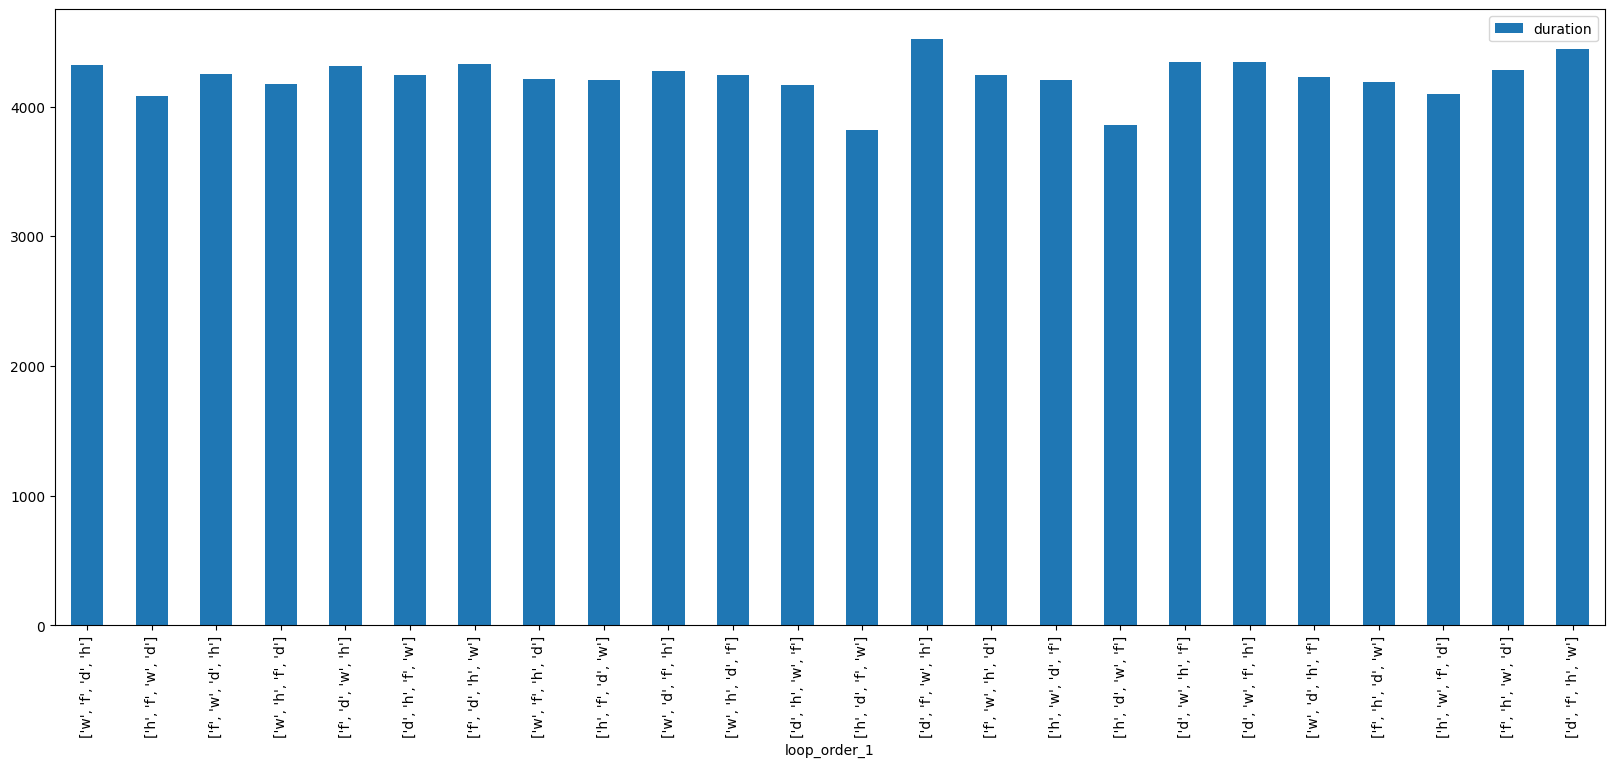

In [20]:
df_vgg1.plot.bar(x="loop_order_1",y="duration",figsize = (20,8))

<AxesSubplot: xlabel='loop_order_1'>

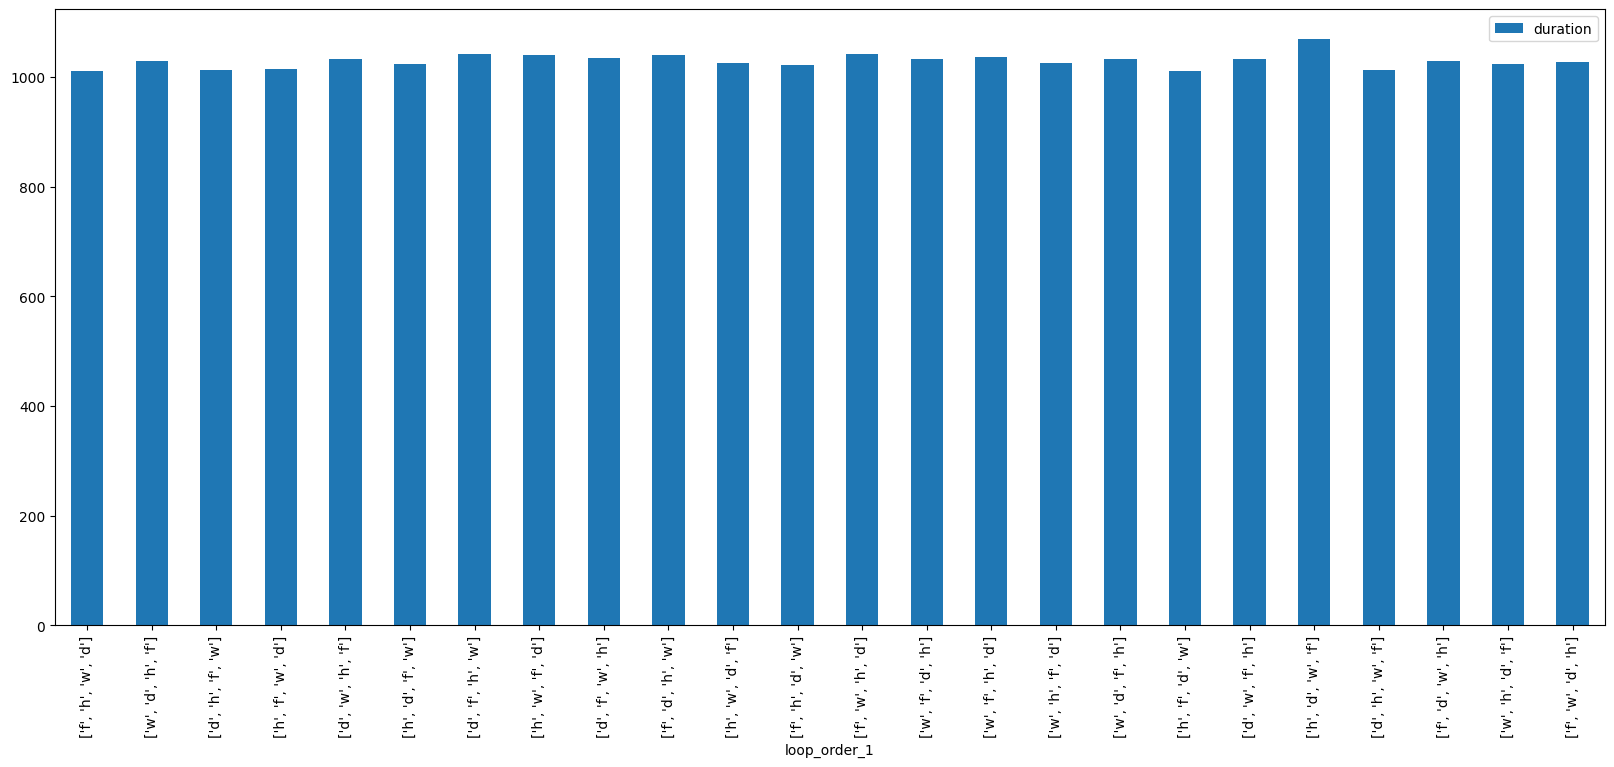

In [21]:
df_vgg2.plot.bar(x="loop_order_1",y="duration",figsize = (20,8))

<AxesSubplot: xlabel='loop_order_1'>

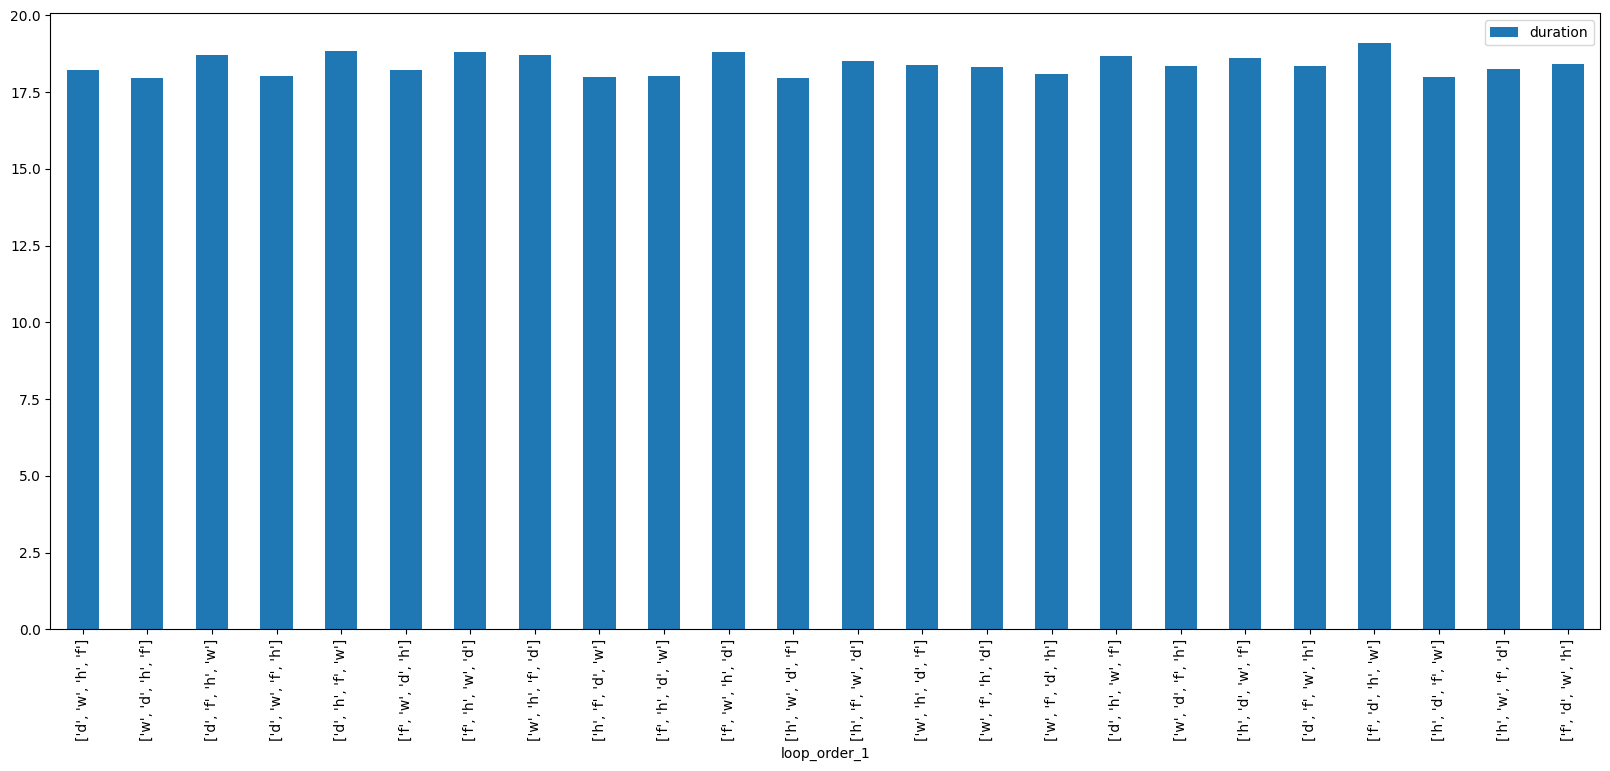

In [22]:
df_vgg3.plot.bar(x="loop_order_1",y="duration",figsize = (20,8))

<AxesSubplot: xlabel='loop_order_1'>

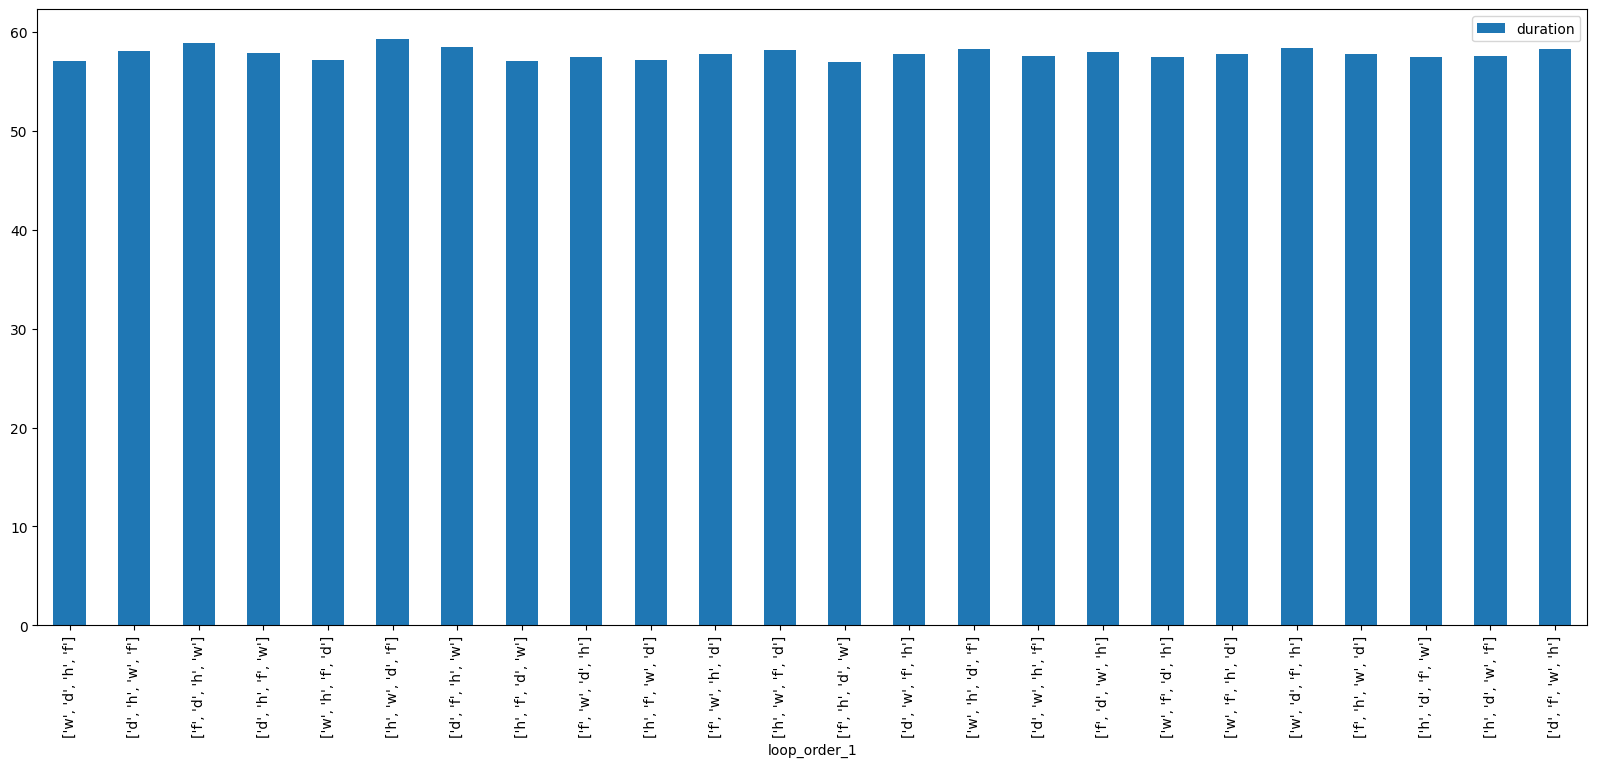

In [23]:
df_vgg4.plot.bar(x="loop_order_1",y="duration",figsize = (20,8))